In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# cwd
print(f'Current working directory: {os.getcwd()}')
# change directory
os.chdir('../')
print(f'New working directory: {os.getcwd()}')

/var/folders/83/j83q5_mj11956_7k9tnld0ym0000gn/T/ipykernel_47215/3914640498.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Current working directory: /Users/gbemidebe/Documents/GitHub/CDImodeling/notebooks
New working directory: /Users/gbemidebe/Documents/GitHub/CDImodeling


In [2]:
from cdi.plotters import Plotters

plotter = Plotters()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
import pandas as pd

desired_columns = ['VW', 'FR', 'CNaCl', 'SSA', 'PV', 'Psave', 'PVmicro', 'ID/IG', 'N', 'O', 'EC']

data = pd.read_excel('data/not_time_series/cdi_data.xlsx', sheet_name='data_cleaned')
data = data[desired_columns]
print(data.shape)
data.head()

(583, 11)


,VW,FR,CNaCl,SSA,PV,Psave,PVmicro,ID/IG,N,O,EC
0,1.2,9.0,390.0,651.0,0.50,3.07,0.18,NaN,NaN,NaN,6.40
1,1.2,9.0,390.0,512.0,0.29,2.27,0.23,NaN,NaN,NaN,4.60
2,1.0,25.0,292.0,1877.0,2.40,5.11,0.30,0.92,4.6,NaN,10.00
3,0.6,25.0,292.0,1877.0,2.40,5.11,0.30,0.92,4.6,NaN,5.63
4,0.8,25.0,292.0,1877.0,2.40,5.11,0.30,0.92,4.6,NaN,8.20


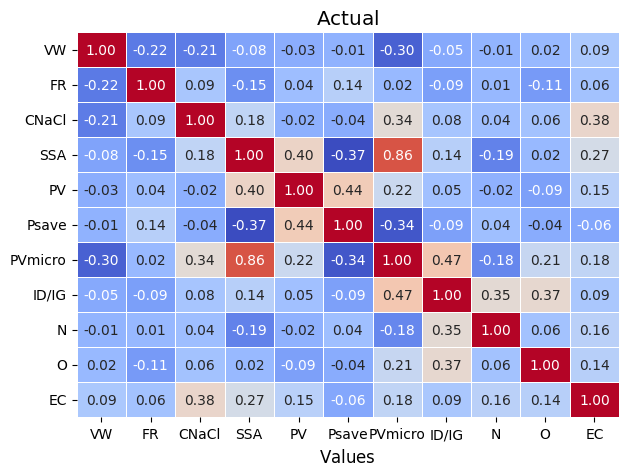

In [4]:
plotter.plot_heat_map(data=data, label = r'$ \rm Actual$', property = 'original',
                    fig_size = (7, 5), save_fig = False)

In [5]:
# drop missing values
clean_data = data.dropna()
print(clean_data.shape)
clean_data.head()

(105, 11)


,VW,FR,CNaCl,SSA,PV,Psave,PVmicro,ID/IG,N,O,EC
20,1.0,10.0,585.0,1860.0,1.04,2.24,0.94,0.90,0.16,7.20,13.30
21,1.1,10.0,585.0,1860.0,1.04,2.24,0.94,0.90,0.16,7.20,5.30
22,1.2,10.0,585.0,1860.0,1.04,2.24,0.94,0.90,0.16,7.20,3.10
183,2.0,10.0,25.0,1016.0,0.78,3.07,0.30,0.94,0.46,6.99,7.25
184,2.0,15.0,25.0,1016.0,0.78,3.07,0.30,0.94,0.46,6.99,6.55


In [6]:
583-105

478

## 3. Imputation

In [7]:
import pandas as pd
import numpy as np
from loguru import logger
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer

from cdi.dataPreprocessing import Imputation

In [8]:
# fill data
# method = 'Bayesian'
# model =  IterativeImputer(random_state=0,max_iter=200)


method = 'ExtraTreesRegressor'
model = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=20),
                                 random_state=0,
                                 max_iter=200)
# method = 'KNN'
# model = KNNImputer(n_neighbors=5, weights="uniform")


IMPUTER = Imputation(data=data, columns=desired_columns, model=model, method=method)

df_imputed = IMPUTER.impute_data(split_data=False)


2024-02-04 19:34:15.773 | INFO     | cdi.dataPreprocessing:impute:95 - Database path:     VW    FR  CNaCl     SSA    PV  Psave  PVmicro  ID/IG    N   O     EC
0  1.2   9.0  390.0   651.0  0.50   3.07     0.18    NaN  NaN NaN   6.40
1  1.2   9.0  390.0   512.0  0.29   2.27     0.23    NaN  NaN NaN   4.60
2  1.0  25.0  292.0  1877.0  2.40   5.11     0.30   0.92  4.6 NaN  10.00
3  0.6  25.0  292.0  1877.0  2.40   5.11     0.30   0.92  4.6 NaN   5.63
4  0.8  25.0  292.0  1877.0  2.40   5.11     0.30   0.92  4.6 NaN   8.20
2024-02-04 19:34:15.774 | INFO     | cdi.dataPreprocessing:impute:96 - ML method: ExtraTreesRegressor

2024-02-04 19:34:15.774 | INFO     | cdi.dataPreprocessing:impute:98 - Number of data points: 583
2024-02-04 19:34:15.775 | WARNING  | cdi.dataPreprocessing:impute:101 - Number of missing values in "VW": 0
2024-02-04 19:34:15.775 | WARNING  | cdi.dataPreprocessing:impute:101 - Number of missing values in "FR": 8
2024-02-04 19:34:15.775 | WARNING  | cdi.dataPreprocessing:

In [9]:
imputed_data = df_imputed.drop(clean_data.index)
print(imputed_data.shape)
imputed_data.head()

(478, 11)


,VW,FR,CNaCl,SSA,PV,Psave,PVmicro,ID/IG,N,O,EC
0,1.2,9.0,390.0,651.0,0.50,3.07,0.18,0.9515,1.4225,8.7095,6.40
1,1.2,9.0,390.0,512.0,0.29,2.27,0.23,0.9795,3.0230,9.7595,4.60
2,1.0,25.0,292.0,1877.0,2.40,5.11,0.30,0.9200,4.6000,6.9320,10.00
3,0.6,25.0,292.0,1877.0,2.40,5.11,0.30,0.9200,4.6000,6.2665,5.63
4,0.8,25.0,292.0,1877.0,2.40,5.11,0.30,0.9200,4.6000,6.9545,8.20


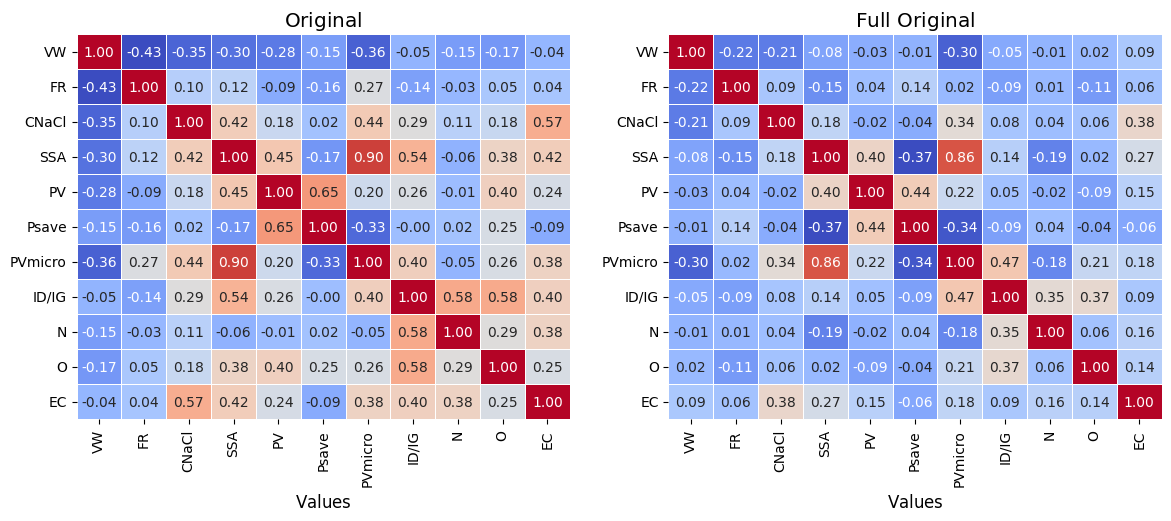

In [10]:
plotter.plot_heat_2map(clean_data, r'$ \rm Original$',
                    data, r'$ \rm Full \ Original$', 
                    property = 'clean_full_original_vs_synthetic',
                    fig_size = (14, 5), save_fig = False)

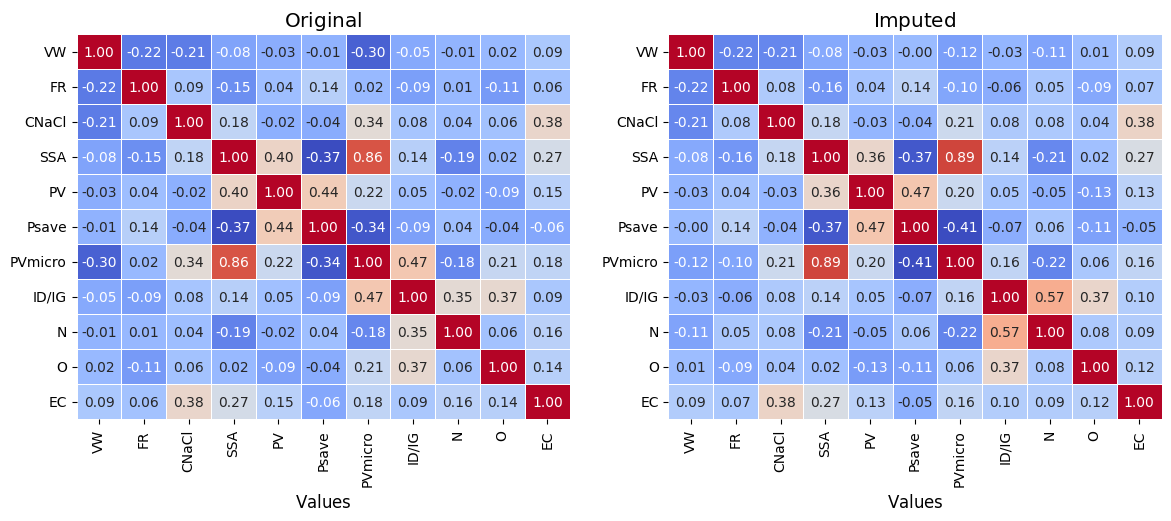

In [11]:
plotter.plot_heat_2map(data, r'$ \rm Original$',
                    df_imputed, r'$ \rm Imputed$', 
                    property = 'full_original_vs_synthetic',
                    fig_size = (14, 5), save_fig = False)

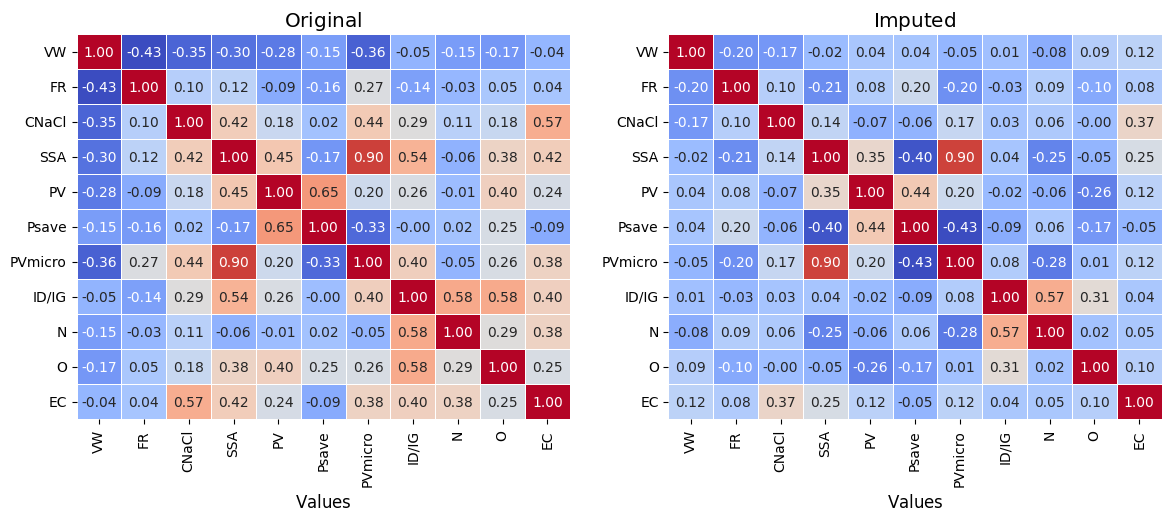

In [12]:
plotter.plot_heat_2map(clean_data, r'$ \rm Original$',
                    imputed_data, r'$ \rm Imputed$', 
                    property = 'cleaned_original_vs_synthetic',
                    fig_size = (14, 5), save_fig = False)

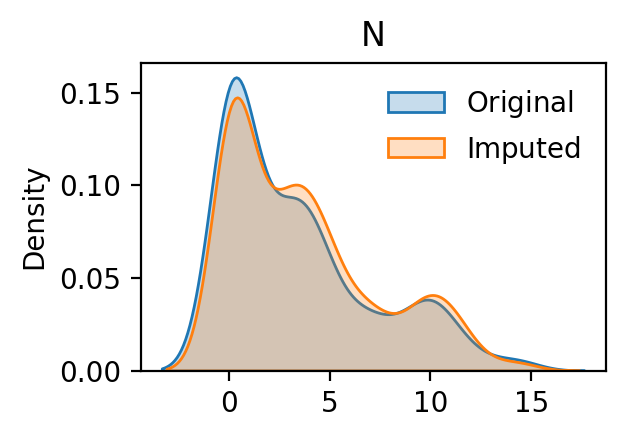

In [13]:
# plot the KDE of the data
idx = np.random.choice(data.columns)

plotter.plot_kde(
                data = [data[idx].values, df_imputed[idx].values],
                labels = [r'$ \rm Original$', r'$ \rm Imputed$'],
                colors = ['C10', 'C1'],
                property = idx,
                fig_size=(3, 2))

# ML model

### Source Model

In [14]:
from cdi.dataPreprocessing import Data

In [15]:
imputed_data.head()

,VW,FR,CNaCl,SSA,PV,Psave,PVmicro,ID/IG,N,O,EC
0,1.2,9.0,390.0,651.0,0.50,3.07,0.18,0.9515,1.4225,8.7095,6.40
1,1.2,9.0,390.0,512.0,0.29,2.27,0.23,0.9795,3.0230,9.7595,4.60
2,1.0,25.0,292.0,1877.0,2.40,5.11,0.30,0.9200,4.6000,6.9320,10.00
3,0.6,25.0,292.0,1877.0,2.40,5.11,0.30,0.9200,4.6000,6.2665,5.63
4,0.8,25.0,292.0,1877.0,2.40,5.11,0.30,0.9200,4.6000,6.9545,8.20


In [16]:
random_seed = 42 #np.random.randint(0, 1000)
logger.info(f'Random seed: {random_seed}')
DataProcess = Data(data=imputed_data, target_column='EC', 
                   test_size=0.15, val_size=0.05, random_seed=random_seed,
                   scaler_name='ETR_imputed_salt_adsorption_capacity')
X_train, X_test, X_val, y_train, y_test, y_val = DataProcess.preprocess()

2024-02-04 19:34:18.067 | INFO     | __main__:<module>:2 - Random seed: 42
2024-02-04 19:34:18.069 | INFO     | cdi.dataPreprocessing:preprocess:37 - mean of Y: 10.519539748953974
2024-02-04 19:34:18.070 | INFO     | cdi.dataPreprocessing:preprocess:39 - Initiated Standardizing data
2024-02-04 19:34:18.073 | SUCCESS  | cdi.dataPreprocessing:preprocess:46 - Standardizing completed
2024-02-04 19:34:18.074 | INFO     | cdi.dataPreprocessing:preprocess:49 - Initiated train-test split for model evaluation and validation
2024-02-04 19:34:18.078 | SUCCESS  | cdi.dataPreprocessing:preprocess:54 - Train: ((382, 10), (382,)) --> 79.92%
2024-02-04 19:34:18.079 | SUCCESS  | cdi.dataPreprocessing:preprocess:55 - Val: ((72, 10), (72,)) --> 15.06%
2024-02-04 19:34:18.080 | SUCCESS  | cdi.dataPreprocessing:preprocess:56 - Test: ((24, 10), (24,)) --> 5.02%
2024-02-04 19:34:18.081 | SUCCESS  | cdi.dataPreprocessing:preprocess:58 - train-test split completed


In [17]:
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(382, 10) (24, 10) (72, 10) (382,) (24,) (72,)


In [18]:
# Import Libraries
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
from tensorflow import keras
from datetime import datetime
from keras import backend as K
# https://github.com/keras-team/keras/issues/7947

# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

# root mean squared error (rmse) for regression
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

class BaseModel(HyperModel):

    def __init__(self):
        pass

    def build(self, hp):
        
        # Specify model
        model = keras.Sequential()

        # Range of models to build
        for i in range(hp.Int('num_layers', 1, 5)):

            model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                min_value=1,
                                                max_value=50, 
                                                step=1),
                                   activation='relu'))
        
        # Output layer
        model.add(keras.layers.Dense(1, activation='linear'))
        
        # Compile the constructed model and return it
        model.compile(
            optimizer=tensorflow.keras.optimizers.legacy.Adam(
                hp.Choice('learning_rate',
                          values=[1e-2, 1e-3, 1e-4, 1e-5])),
                          loss="mean_squared_error", metrics=["mean_squared_error", rmse, r_square])
        return model

`import kerastuner` is deprecated, please use `import keras_tuner`.


In [19]:
# Construct the Hyperband tuner using the hypermodel class created
hypermodel = BaseModel()  
# BayesianOptimization  tuner
BayesianTuner = BayesianOptimization(hypermodel, objective='val_loss', max_trials=100, seed=42, project_name=f'{datetime.now().strftime("%Y-%m-%d")}_salt_adsorption_capacity_BayesOpt')
# early stopping
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
# Search for the best parameters
BayesianTuner.search(X_train, y_train,
             epochs=100, callbacks=[earlystopping],
             validation_data=(X_val, y_val))
# Get the best hyperparameters from the search
params = BayesianTuner.get_best_hyperparameters()[0]
# Build the model using the best hyperparameters
SourceModel = BayesianTuner.hypermodel.build(params)
# Train the best fitting model
SourceModel.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), callbacks=[earlystopping])

Trial 100 Complete [00h 00m 03s]
val_loss: 39.15333557128906

Best val_loss So Far: 23.90958595275879
Total elapsed time: 00h 05m 10s
Epoch 1/1000
12/12 [==============================] - 0s 7ms/step - loss: 85.6603 - mean_squared_error: 85.6603 - rmse: 6.6443 - r_square: -0.5668 - val_loss: 91.6178 - val_mean_squared_error: 91.6178 - val_rmse: 6.7485 - val_r_square: -0.3659
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: 51.6764 - mean_squared_error: 51.6764 - rmse: 5.0821 - r_square: -0.0097 - val_loss: 79.1110 - val_mean_squared_error: 79.1110 - val_rmse: 6.2902 - val_r_square: -0.1195
Epoch 3/1000
12/12 [==============================] - 0s 2ms/step - loss: 46.7742 - mean_squared_error: 46.7742 - rmse: 4.8486 - r_square: 0.0321 - val_loss: 74.1668 - val_mean_squared_error: 74.1668 - val_rmse: 6.0480 - val_r_square: -0.0354
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 43.7632 - mean_squared_error: 43.7632 - rmse: 4.6459 - r_squa

In [81]:
# save params
params_dict = params.values
params_dict

{'num_layers': 5,
 'units_0': 50,
 'learning_rate': 0.01,
 'units_1': 50,
 'units_2': 50,
 'units_3': 50,
 'units_4': 50}

In [20]:
SourceModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                550       
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 50)                2550      
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10801 (42.19 KB)
Trainable params: 10801

In [21]:
history_source_model = pd.DataFrame(SourceModel.history.history)

history_source_model.head()

,loss,mean_squared_error,rmse,r_square,val_loss,val_mean_squared_error,val_rmse,val_r_square
0,85.660347,85.660347,6.644289,-0.566778,91.617828,91.617828,6.748507,-0.365860
1,51.676437,51.676437,5.082141,-0.009706,79.111015,79.111015,6.290234,-0.119452
2,46.774193,46.774193,4.848602,0.032114,74.166786,74.166786,6.047989,-0.035401
3,43.763203,43.763203,4.645850,0.152819,70.266342,70.266342,5.867911,0.020916
4,40.250809,40.250809,4.596817,0.211812,70.137115,70.137115,5.816418,-0.002726


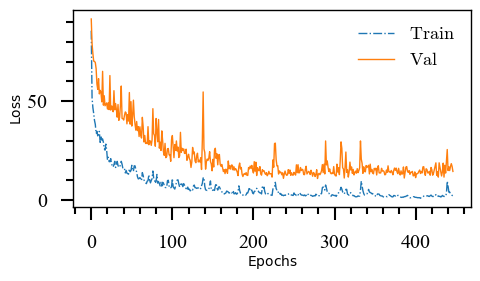

In [22]:
plotter.plot_loss(history_source_model['loss'], history_source_model['val_loss'], save_fig=False)

1/1 [==============================] - 0s 8ms/step


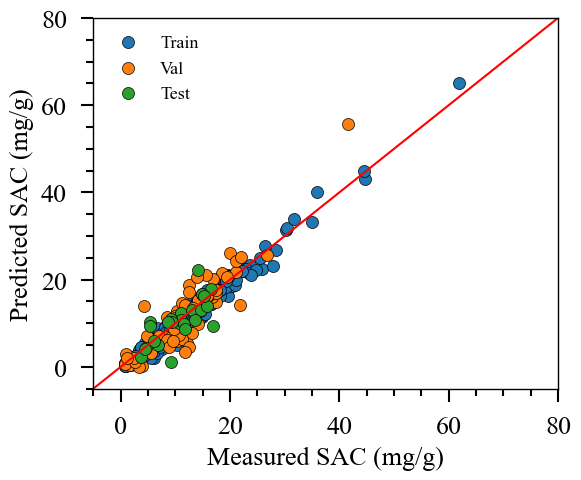

<Figure size 640x480 with 0 Axes>

In [23]:
train_predictions = SourceModel.predict(X_train).flatten()
val_predictions = SourceModel.predict(X_val).flatten()
test_predictions = SourceModel.predict(X_test).flatten()

plotter.plot_model_eval(
            predictions={'train': train_predictions, 'test': test_predictions, 'val': val_predictions},
                        labels={'train': y_train, 'test': y_test, 'val': y_val}, 
                        llimit=-5, ulimit=80, fig_size=(6, 5),
                        name='model_eval', 
                        x_label='Measured SAC (mg/g)',
                        y_label='Predicted SAC (mg/g)')

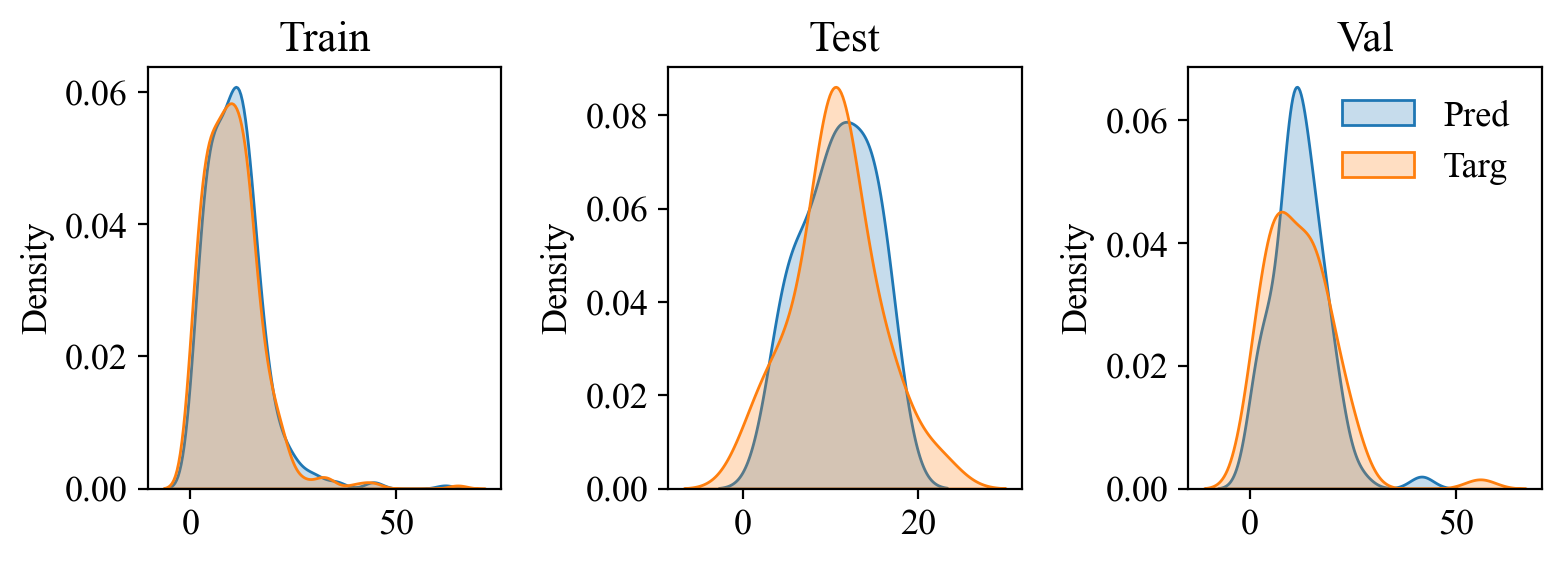

In [24]:
plotter.plot_pred_distribution(fig_size=(8, 3))

In [25]:
# accuracy
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Training set')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train, train_predictions)):0.2f}, R^2: {r2_score(y_train, train_predictions):0.2f}, MAE: {mean_absolute_error(y_train, train_predictions):0.2f}')
print('Validation set')
print(f'RMSE: {np.sqrt(mean_squared_error(y_val, val_predictions)):0.2f}, R^2: {r2_score(y_val, val_predictions):0.2f}, MAE: {mean_absolute_error(y_val, val_predictions):0.2f}')
print('Test set')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, test_predictions)):0.2f}, R^2: {r2_score(y_test, test_predictions):0.2f}, MAE: {mean_absolute_error(y_test, test_predictions):0.2f}')

Training set
RMSE: 1.26, R^2: 0.97, MAE: 0.94
Validation set
RMSE: 3.79, R^2: 0.81, MAE: 2.77
Test set
RMSE: 3.39, R^2: 0.50, MAE: 2.42


In [26]:
SourceModel.save_weights(f'./models/salt_adsorption_source_model_ETR_imputation_approach.h5')

In [27]:
SourceModel.get_weights()

[array([[ 4.56645675e-02, -3.98284830e-02, -2.49535307e-01,
         -6.60920680e-01,  5.99709265e-02,  4.40980904e-02,
         -9.93414372e-02, -5.17318666e-01,  4.68591936e-02,
          2.09425181e-01,  1.22615159e-01,  4.56668213e-02,
          2.24718511e-01,  1.02792121e-01, -2.92110771e-01,
         -1.01529323e-01, -6.45252392e-02, -6.84294760e-01,
         -1.18311763e-01, -2.74360608e-02,  2.02671662e-01,
          1.86884135e-01, -1.27290085e-01,  5.01337171e-01,
          2.52368450e-01,  7.14709461e-02,  9.00979698e-01,
          1.24080800e-01, -6.78970337e-01, -2.40392029e-01,
          1.67733163e-01, -1.77480048e-03, -4.26891267e-01,
          5.03818020e-02, -2.34945528e-02,  7.39601910e-01,
          4.87826705e-01,  1.30504787e-01, -1.24183071e+00,
          9.15894657e-02,  1.83171555e-01, -1.15363407e+00,
          2.38291398e-01,  8.42000544e-02,  2.53477655e-02,
         -8.13117847e-02, -2.60567307e-01, -2.85779446e-01,
         -1.62371751e-02, -1.99540570e-0

### Transfer Learning

In [38]:
# Create a new model for transfer learning
from tensorflow.keras.models import clone_model
TargetModel = clone_model(SourceModel)

In [39]:
# Restore the weights
TargetModel.load_weights('./models/salt_adsorption_source_model_ETR_imputation_approach.h5')
TargetModel.get_weights()

[array([[ 4.56645675e-02, -3.98284830e-02, -2.49535307e-01,
         -6.60920680e-01,  5.99709265e-02,  4.40980904e-02,
         -9.93414372e-02, -5.17318666e-01,  4.68591936e-02,
          2.09425181e-01,  1.22615159e-01,  4.56668213e-02,
          2.24718511e-01,  1.02792121e-01, -2.92110771e-01,
         -1.01529323e-01, -6.45252392e-02, -6.84294760e-01,
         -1.18311763e-01, -2.74360608e-02,  2.02671662e-01,
          1.86884135e-01, -1.27290085e-01,  5.01337171e-01,
          2.52368450e-01,  7.14709461e-02,  9.00979698e-01,
          1.24080800e-01, -6.78970337e-01, -2.40392029e-01,
          1.67733163e-01, -1.77480048e-03, -4.26891267e-01,
          5.03818020e-02, -2.34945528e-02,  7.39601910e-01,
          4.87826705e-01,  1.30504787e-01, -1.24183071e+00,
          9.15894657e-02,  1.83171555e-01, -1.15363407e+00,
          2.38291398e-01,  8.42000544e-02,  2.53477655e-02,
         -8.13117847e-02, -2.60567307e-01, -2.85779446e-01,
         -1.62371751e-02, -1.99540570e-0

In [82]:
# new data from the same distribution but not imputed
DataProcess_transfer = Data(data=clean_data, target_column='EC', 
                   test_size=0.15, val_size=0.1, random_seed=104,
                   scaler_name='actual_specific_adsortion_capacity')
X_train_transfer, X_test_transfer, X_val_transfer, y_train_transfer, y_test_transfer, y_val_transfer = DataProcess_transfer.preprocess()

2024-02-04 22:29:53.580 | INFO     | cdi.dataPreprocessing:preprocess:37 - mean of Y: 10.347428571428571
2024-02-04 22:29:53.582 | INFO     | cdi.dataPreprocessing:preprocess:39 - Initiated Standardizing data
2024-02-04 22:29:53.586 | SUCCESS  | cdi.dataPreprocessing:preprocess:46 - Standardizing completed
2024-02-04 22:29:53.587 | INFO     | cdi.dataPreprocessing:preprocess:49 - Initiated train-test split for model evaluation and validation
2024-02-04 22:29:53.589 | SUCCESS  | cdi.dataPreprocessing:preprocess:54 - Train: ((78, 10), (78,)) --> 74.29%
2024-02-04 22:29:53.591 | SUCCESS  | cdi.dataPreprocessing:preprocess:55 - Val: ((17, 10), (17,)) --> 16.19%
2024-02-04 22:29:53.592 | SUCCESS  | cdi.dataPreprocessing:preprocess:56 - Test: ((10, 10), (10,)) --> 9.52%
2024-02-04 22:29:53.592 | SUCCESS  | cdi.dataPreprocessing:preprocess:58 - train-test split completed


In [64]:
TargetModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                550       
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 50)                2550      
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10801 (42.19 KB)
Trainable params: 10801

In [65]:
TargetModel.compile(
            optimizer=tensorflow.keras.optimizers.legacy.Adam(learning_rate=0.001),
                          loss="mean_squared_error", 
                          metrics=["mean_squared_error", rmse, r_square])

In [66]:
# Train the best fitting model
earlystopping_transfer = EarlyStopping(monitor="mean_squared_error", patience=2, verbose=1, mode='auto')
TargetModel.fit(X_train_transfer, y_train_transfer, 
                epochs=1000, 
                validation_data=(X_val_transfer, y_val_transfer), 
                callbacks=[earlystopping_transfer])

Epoch 1/1000


3/3 [==============================] - 0s 38ms/step - loss: 4.0722 - mean_squared_error: 4.0722 - rmse: 1.3575 - r_square: 0.8582 - val_loss: 23.2438 - val_mean_squared_error: 23.2438 - val_rmse: 3.2069 - val_r_square: 0.1845
Epoch 2/1000
3/3 [==============================] - 0s 6ms/step - loss: 3.5657 - mean_squared_error: 3.5657 - rmse: 1.3178 - r_square: 0.8663 - val_loss: 22.7545 - val_mean_squared_error: 22.7545 - val_rmse: 3.2070 - val_r_square: 0.2017
Epoch 3/1000
3/3 [==============================] - 0s 6ms/step - loss: 3.2807 - mean_squared_error: 3.2807 - rmse: 1.2913 - r_square: 0.8477 - val_loss: 22.4071 - val_mean_squared_error: 22.4071 - val_rmse: 3.1651 - val_r_square: 0.2138
Epoch 4/1000
3/3 [==============================] - 0s 6ms/step - loss: 3.2490 - mean_squared_error: 3.2490 - rmse: 1.2738 - r_square: 0.8837 - val_loss: 21.3645 - val_mean_squared_error: 21.3645 - val_rmse: 3.0669 - val_r_square: 0.2504
Epoch 5/1000
3/3 [==============================] - 0s 6ms/s

1/1 [==============================] - 0s 8ms/step


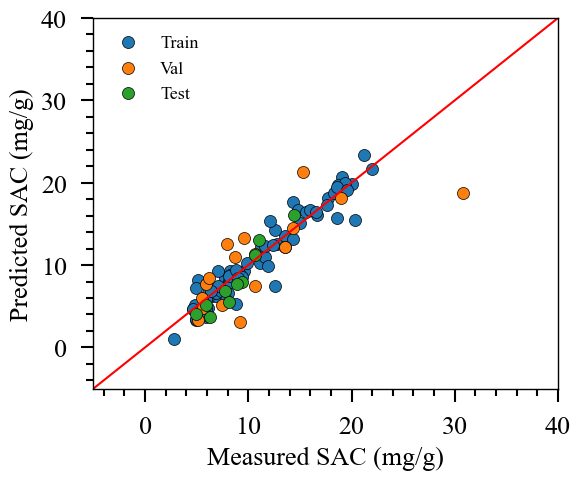

<Figure size 700x500 with 0 Axes>

In [67]:
train_predictions_transfer = TargetModel.predict(X_train_transfer).flatten()
val_predictions_transfer = TargetModel.predict(X_val_transfer).flatten()
test_predictions_transfer = TargetModel.predict(X_test_transfer).flatten()

plotter.plot_model_eval(
            predictions={'train': train_predictions_transfer, 'test': test_predictions_transfer, 'val': val_predictions_transfer},
                        labels={'train': y_train_transfer, 'test': y_test_transfer, 'val': y_val_transfer}, 
                        llimit=-5, ulimit=40, fig_size=(6, 5),
                        name='TargetModel_eval', 
                        x_label='Measured SAC (mg/g)',
                        y_label='Predicted SAC (mg/g)')

In [68]:
# accuracy
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Training set')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train_transfer, train_predictions_transfer)):0.2f}, R^2: {r2_score(y_train_transfer, train_predictions_transfer):0.2f}, MAE: {mean_absolute_error(y_train_transfer, train_predictions_transfer):0.2f}')
print('Validation set')
print(f'RMSE: {np.sqrt(mean_squared_error(y_val_transfer, val_predictions_transfer)):0.2f}, R^2: {r2_score(y_val_transfer, val_predictions_transfer):0.2f}, MAE: {mean_absolute_error(y_val_transfer, val_predictions_transfer):0.2f}')
print('Test set')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_transfer, test_predictions_transfer)):0.2f}, R^2: {r2_score(y_test_transfer, test_predictions_transfer):0.2f}, MAE: {mean_absolute_error(y_test_transfer, test_predictions_transfer):0.2f}')

Training set
RMSE: 1.49, R^2: 0.92, MAE: 1.04
Validation set
RMSE: 4.13, R^2: 0.40, MAE: 2.96
Test set
RMSE: 1.62, R^2: 0.83, MAE: 1.46


In [69]:
history_target_model = pd.DataFrame(TargetModel.history.history)

history_target_model.head()

""


In [70]:
TargetModel.save_weights(f'./models/salt_adsorption_capacity_target_model_ETR_imputation_approach.h5')